In [1]:
%matplotlib inline

import copy
import numpy as np
import pandas as pd
import random
import re
import string

from IPython.display import display, HTML

import matplotlib.pyplot as plt

In [ ]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 7.2 MB/s eta 0:00:00


In [ ]:
import openai

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [ ]:
!pip install google-colab

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.8 MB/s eta 0:00:00


In [ ]:
scopus = pd.read_csv('scopus.csv')
scopus_1 = pd.read_csv('scopus_1.csv')
scopus_2 = pd.read_csv('scopus_2.csv')
scopus_3 = pd.read_csv('scopus_3.csv')

In [ ]:
scopus_1.head()
print(f'the shape of scopus_1 is{scopus_1.shape}')

the shape of scopus_1 is(1132, 24)


In [ ]:
print(f'the shape of scopus_2 is{scopus_2.shape}' )

the shape of scopus_2 is(947, 24)


In [ ]:
scopus_3.head()
print(f'the shape of scopus_3 is{scopus_3.shape}' )

the shape of scopus_3 is(1612, 24)


In [ ]:
scopus.head()
print(f'the shape of scopus is{scopus.shape}' )

the shape of scopus is(226, 24)


## COPY & STORE DATASETS FOR PRESERVATION AND TRANSFORMATION 

In [ ]:
scopus_copy = copy.deepcopy(scopus)
scopus_1copy = copy.deepcopy(scopus_1)
scopus_2copy = copy.deepcopy(scopus_2)
scopus_3copy = copy.deepcopy(scopus_3)

# CHECKING FOR MISSING VALUES AND DROPPING COLUMNS WITH MISSING VALUES

In [ ]:
scopus_copy.shape
scopus_copy.isnull().sum()

Authors                        0
Author(s) ID                   0
Title                          0
Year                           0
Source title                   0
Volume                        31
Issue                         88
Art. No.                     171
Page start                    57
Page end                      59
Page count                   220
Cited by                      53
DOI                           30
Link                           0
Affiliations                  10
Authors with affiliations      8
Abstract                       0
Author Keywords               63
Index Keywords                15
Document Type                  0
Publication Stage              0
Open Access                  226
Source                         0
EID                            0
dtype: int64

In [ ]:
scopus_copy.dropna(axis=1, inplace=True)
scopus_copy.head()

,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895


In [ ]:
scopus_1copy.isnull().sum()

Authors                         0
Author(s) ID                    0
Title                           0
Year                            0
Source title                    0
Volume                         91
Issue                         495
Art. No.                      624
Page start                    509
Page end                      522
Page count                   1110
Cited by                      300
DOI                            38
Link                            0
Affiliations                   34
Authors with affiliations      30
Abstract                        0
Author Keywords               219
Index Keywords                105
Document Type                   0
Publication Stage               0
Open Access                  1132
Source                          0
EID                             0
dtype: int64

In [ ]:
scopus_1copy.dropna(axis=1, inplace=True)
scopus_1copy.head()

,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID
0,"Ibrahim A., Vaidyanathan A., Primakov S., Belm...",57205711181;57218433423;57209347345;5772184900...,Deep learning based identification of bone sci...,2023,Cancer Imaging,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Metastatic bone disease (MBD) is the ...,Article,Final,Scopus,2-s2.0-85146916187
1,"Liu X., Zhu Z., Wang K., Zhang Y., Li J., Wang...",57218958081;57864861300;57865405800;5722227337...,Semiautomated pelvic lymph node treatment resp...,2023,Cancer Imaging,https://www.scopus.com/inward/record.uri?eid=2...,Background: The evaluation of treatment respon...,Article,Final,Scopus,2-s2.0-85146405679
2,"Hu L., Fu C., Song X., Grimm R., von Busch H.,...",57219012589;58066160800;58066160900;5801900310...,Automated deep-learning system in the assessme...,2023,Cancer Imaging,https://www.scopus.com/inward/record.uri?eid=2...,Background: Deep-learning-based computer-aided...,Article,Final,Scopus,2-s2.0-85146329016
3,"Tsuneki M., Abe M., Ichihara S., Kanavati F.",23988244000;57224406311;57000025000;57024229600;,Inference of core needle biopsy whole slide im...,2023,BMC Cancer,https://www.scopus.com/inward/record.uri?eid=2...,Background: Prostate cancer is often a slowly ...,Article,Final,Scopus,2-s2.0-85145520209
4,"Li Z., Fang J., Qiu R., Gong H., Zhang W., Li ...",56402199300;58086082800;58086082900;5647986190...,CDA-Net: A contrastive deep adversarial model ...,2023,Biomedical Signal Processing and Control,https://www.scopus.com/inward/record.uri?eid=2...,Prostate cancer is becoming one of the deadlie...,Article,Final,Scopus,2-s2.0-85147190850


In [ ]:
scopus_2copy.isnull().sum()

Authors                        0
Author(s) ID                   0
Title                          0
Year                           0
Source title                   0
Volume                        79
Issue                        306
Art. No.                     625
Page start                   317
Page end                     340
Page count                   938
Cited by                     216
DOI                           35
Link                           0
Affiliations                  35
Authors with affiliations     17
Abstract                       0
Author Keywords              299
Index Keywords                76
Document Type                  0
Publication Stage              0
Open Access                  947
Source                         0
EID                            0
dtype: int64

In [ ]:
scopus_2copy.dropna(axis=1, inplace=True)
scopus_2copy.head()

,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID
0,"Xu D., Ma M., Cao M., Kishan A.U., Nickols N.G...",57907081200;58082277600;8873427100;48661114400...,Mask R-CNN assisted 2.5D object detection pipe...,2023,Scientific Reports,https://www.scopus.com/inward/record.uri?eid=2...,Prostate-specific membrane antigen (PSMA) posi...,Article,Final,Scopus,2-s2.0-85147038670
1,"Wang Y., Qian H., Shao X., Zhang H., Liu S., P...",57225157781;57195737802;57158407600;5718856267...,Multimodal convolutional neural networks based...,2023,Spectrochimica Acta - Part A: Molecular and Bi...,https://www.scopus.com/inward/record.uri?eid=2...,We collected surface-enhanced Raman spectrosco...,Article,Final,Scopus,2-s2.0-85147842651
2,"De-Colle C., Kirby A., Russell N., Shaitelman ...",56532471000;57658257500;56260210100;3613616990...,Adaptive radiotherapy for breast cancer,2023,Clinical and Translational Radiation Oncology,https://www.scopus.com/inward/record.uri?eid=2...,Research in the field of local and locoregiona...,Review,Final,Scopus,2-s2.0-85146009085
3,"Miyahira A.K., Hawley J.E., Adelaiye-Ogala R.,...",23397589200;57194703946;57195642457;5557629210...,Exploring new frontiers in prostate cancer res...,2023,Prostate,https://www.scopus.com/inward/record.uri?eid=2...,Introduction: The 2022 Coffey−Holden Prostate ...,Review,Final,Scopus,2-s2.0-85143393120
4,"Feuerecker B., Heimer M.M., Geyer T., Fabritiu...",55644376000;57200326667;57204431759;5719199665...,Artificial Intelligence in Oncological Hybrid ...,2023,RoFo Fortschritte auf dem Gebiet der Rontgenst...,https://www.scopus.com/inward/record.uri?eid=2...,Background Artificial intelligence (AI) applic...,Review,Final,Scopus,2-s2.0-85147317848


In [ ]:
scopus_3copy.isnull().sum()

Authors                         0
Author(s) ID                    0
Title                           0
Year                            0
Source title                    0
Volume                        124
Issue                         631
Art. No.                      901
Page start                    680
Page end                      704
Page count                   1589
Cited by                      379
DOI                            56
Link                            0
Affiliations                   43
Authors with affiliations      35
Abstract                        0
Author Keywords               398
Index Keywords                137
Document Type                   0
Publication Stage               0
Open Access                  1612
Source                          0
EID                             0
dtype: int64

In [ ]:
scopus_3copy.dropna(axis=1, inplace=True)
scopus_3copy.head()

,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID
0,"Cheng X., Zeng Z., Yang H., Chen Y., Liu Y., Z...",57218387580;57224188672;58023491600;5808150020...,Novel cuproptosis-related long non-coding RNA ...,2023,BMC Cancer,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Cuproptosis, an emerging form of p...",Article,Final,Scopus,2-s2.0-85147019454
1,"Ibrahim A., Vaidyanathan A., Primakov S., Belm...",57205711181;57218433423;57209347345;5772184900...,Deep learning based identification of bone sci...,2023,Cancer Imaging,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: Metastatic bone disease (MBD) is the ...,Article,Final,Scopus,2-s2.0-85146916187
2,"Yuan Y., Gao F., Chang Y., Zhao Q., He X.",58071392200;57224175888;25630132900;1144048740...,Advances of mRNA vaccine in tumor: a maze of o...,2023,Biomarker Research,https://www.scopus.com/inward/record.uri?eid=2...,High-frequency mutations in tumor genomes coul...,Review,Final,Scopus,2-s2.0-85146501585
3,"Huang R.-H., Hong Y.-K., Du H., Ke W.-Q., Lin ...",58062745500;58062797700;58062789200;5806278930...,A machine learning framework develops a DNA re...,2023,Journal of Translational Medicine,https://www.scopus.com/inward/record.uri?eid=2...,Recent studies have identified DNA replication...,Article,Final,Scopus,2-s2.0-85146195350
4,"Bauckneht M., Marini C., Cossu V., Campi C., R...",55617887700;58041763700;57194147065;5779338270...,Gene’s expression underpinning the divergent p...,2023,Journal of Translational Medicine,https://www.scopus.com/inward/record.uri?eid=2...,Background: Positron Emission Tomography (PET)...,Article,Final,Scopus,2-s2.0-85145510415


## CONCATENATING THE DATASETS

In [ ]:
merged_scopus = pd.concat([scopus_copy, scopus_1copy,scopus_2copy, scopus_3copy], axis=0, ignore_index=True)
merged_scopus

,Authors,Author(s) ID,Title,Year,Source title,Link,Abstract,Document Type,Publication Stage,Source,EID
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,https://www.scopus.com/inward/record.uri?eid=2...,A pathologist's optical microscopic examinatio...,Article,Final,Scopus,2-s2.0-85147460992
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,https://www.scopus.com/inward/record.uri?eid=2...,When researchers are faced with building machi...,Article,Final,Scopus,2-s2.0-85146480471
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The accurate and reliable segmentatio...,Article,Final,Scopus,2-s2.0-85143644976
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,https://www.scopus.com/inward/record.uri?eid=2...,"In the past few years, convolutional neural ne...",Article,Final,Scopus,2-s2.0-85138030059
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,https://www.scopus.com/inward/record.uri?eid=2...,The automatic and accurate segmentation of the...,Article,Final,Scopus,2-s2.0-85119436895
...,...,...,...,...,...,...,...,...,...,...,...
3912,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,https://www.scopus.com/inward/record.uri?eid=2...,Pattern recognition analysis refers to the use...,Conference Paper,Final,Scopus,2-s2.0-0036520144
3913,"Ho S.-M., Lau K.-M.",7403713823;34868334900;,DNA microarrays in prostate cancer,2002,Current Urology Reports,https://www.scopus.com/inward/record.uri?eid=2...,DNA microarray technology provides a means to ...,Article,Final,Scopus,2-s2.0-0036483670
3914,"Su A.I., Schultz P.G., Welsh J.B., Sapinoso L....",7005096701;57219105974;57204151090;6602443640;...,Molecular classification of human carcinomas b...,2001,Cancer Research,https://www.scopus.com/inward/record.uri?eid=2...,Classification of human tumors according to th...,Article,Final,Scopus,2-s2.0-0035887459
3915,"Zupan B., Demšar J., Kattan M.W., Beck J.R., B...",7003934784;55075851300;7102396973;7403532482;7...,Machine learning for survival analysis: A case...,2000,Artificial Intelligence in Medicine,https://www.scopus.com/inward/record.uri?eid=2...,Machine learning techniques have recently rece...,Article,Final,Scopus,2-s2.0-0343081009


In [ ]:
merged_scopus = merged_scopus[['Authors','Author(s) ID', 'Title', 'Year', 'Source title','Abstract']]

In [ ]:
## Renaming Columns for ease of use
merged_scopus.columns = ['authors', 'authors_id', 'title', 'year', 'source_title', 'abstract']
merged_scopus.head()

,authors,authors_id,title,year,source_title,abstract
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,A pathologist's optical microscopic examinatio...
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,When researchers are faced with building machi...
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne..."
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,The automatic and accurate segmentation of the...


In [ ]:
merged_scopus.isnull().sum()

authors         0
authors_id      0
title           0
year            0
source_title    0
abstract        0
dtype: int64

In [ ]:
merged_copy = copy.deepcopy(merged_scopus)

In [ ]:
merged_copy

,authors,authors_id,title,year,source_title,abstract
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,A pathologist's optical microscopic examinatio...
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,When researchers are faced with building machi...
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne..."
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,The automatic and accurate segmentation of the...
...,...,...,...,...,...,...
3912,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,Pattern recognition analysis refers to the use...
3913,"Ho S.-M., Lau K.-M.",7403713823;34868334900;,DNA microarrays in prostate cancer,2002,Current Urology Reports,DNA microarray technology provides a means to ...
3914,"Su A.I., Schultz P.G., Welsh J.B., Sapinoso L....",7005096701;57219105974;57204151090;6602443640;...,Molecular classification of human carcinomas b...,2001,Cancer Research,Classification of human tumors according to th...
3915,"Zupan B., Demšar J., Kattan M.W., Beck J.R., B...",7003934784;55075851300;7102396973;7403532482;7...,Machine learning for survival analysis: A case...,2000,Artificial Intelligence in Medicine,Machine learning techniques have recently rece...


In [ ]:
merged_copy['abstract_words'] = merged_copy.abstract.apply(lambda x: len(x.split(' ')))
merged_copy.head()

,authors,authors_id,title,year,source_title,abstract,abstract_words
0,"Falahkheirkhah K., Tiwari S., Yeh K., Gupta S....",57215384000;56585324700;57212661465;3507264310...,Deepfake Histologic Images for Enhancing Digit...,2023,Laboratory investigation; a journal of technic...,A pathologist's optical microscopic examinatio...,286
1,"Isaksson L.J., Repetto M., Summers P.E., Pepa ...",57214938071;57211782627;58070239200;5720132306...,High-performance prediction models for prostat...,2023,Informatics in Medicine Unlocked,When researchers are faced with building machi...,219
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221
4,"Zhang G., Shen X., Zhang Y.-D., Luo Y., Luo J....",57197828490;57213270426;35786830100;5771700840...,Cross-Modal Prostate Cancer Segmentation via S...,2022,IEEE Journal of Biomedical and Health Informatics,The automatic and accurate segmentation of the...,146


In [ ]:
# Filter rows with "computer vision" in the "Abstract" column


computer_vision_df = merged_copy[merged_copy['abstract'].str.contains('computer vision|algorithm', case=False)]
computer_vision_df.shape

(1154, 7)

In [ ]:
computer_vision_df.head()

,authors,authors_id,title,year,source_title,abstract,abstract_words
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,261
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,210
13,"Naik N., Tokas T., Shetty D.K., Hameed B.M.Z.,...",57205319450;14038434500;55578389700;5721381163...,Role of Deep Learning in Prostate Cancer Manag...,2022,Journal of Clinical Medicine,This review aims to present the applications o...,238


<Axes: title={'center': 'Distribution of Abstract Words'}, ylabel='Frequency'>

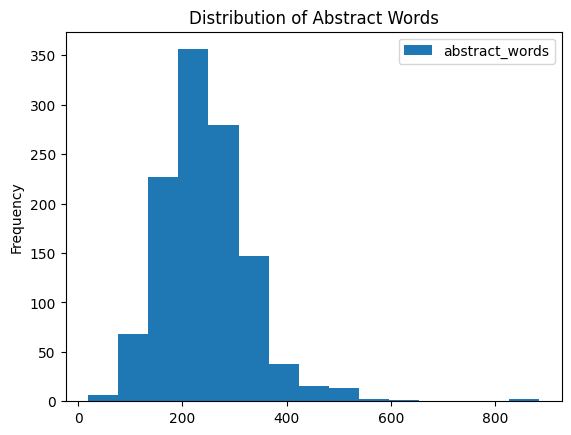

In [ ]:
computer_vision_df[['abstract_words']].plot(kind='hist', bins=15, title='Distribution of Abstract Words')

## The Abstracts contain between 150 to 400 words

In [ ]:
def plot_bigrams(df_column=None, title=None):
    
    word_data = computer_vision_df[df_column].tolist()
    word_data = [i.split(' ') for i in word_data]
    word_data = [item for sublist in word_data for item in sublist]
    bigrams = (pd.Series(nltk.ngrams(word_data, 2)).value_counts())[:10]
    bigrams.sort_values().plot.barh(figsize=(5, 5), title=title)

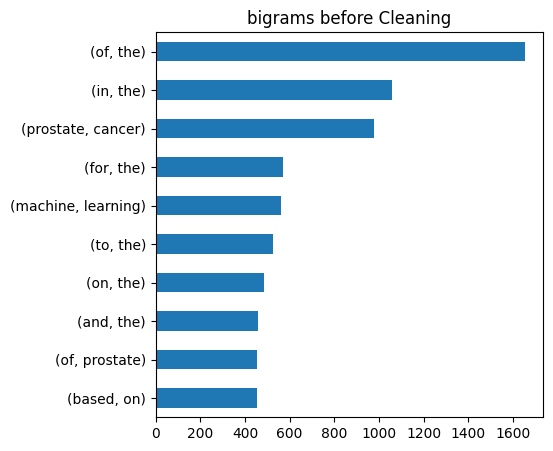

In [ ]:
plot_bigrams(df_column='abstract', title='bigrams before Cleaning')

In [ ]:
def plot_trigrams(df_column=None, title=None):
    
    word_data = computer_vision_df[df_column].tolist()
    word_data = [i.split(' ') for i in word_data]
    word_data = [item for sublist in word_data for item in sublist]
    trigrams = (pd.Series(nltk.ngrams(word_data, 3)).value_counts())[:10]
    trigrams.sort_values().plot.barh(color='orange', figsize=(5, 5), title=title)

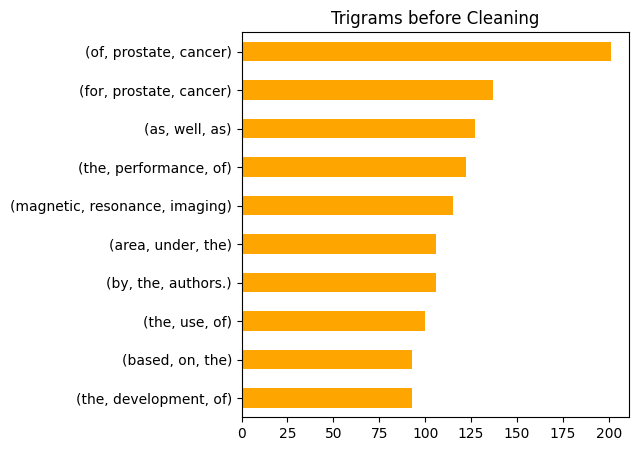

In [ ]:
plot_trigrams(df_column='abstract', title='Trigrams before Cleaning')

# Text Cleaning For Topic Modeling

In [ ]:
stop_words=(set(stopwords.words('english')))
word_lemmatizer = WordNetLemmatizer()

In [ ]:
     add_stop_words = ['prostate', 'cancer', 'prostate cancer', 'PSA', 'Gleason score', 'biopsy','study', 'treatment','dataset', 'datasets', '""', 'data','train', 'test', 'method', 'used', 'using' 'propose', 'approach','train', 'suggest', 'patient','cancer','±','©', 'feature', 'androgen deprivation therapy', 'radical prostatectomy', 'radiotherapy', 'hormone therapy', 'metastasis','Learning','Algorithm', 'Machine', 'Model', 'Using', 'Result', 'Set', 'Accuracy', 'Patient', 'Classification', 'Study', 'AUC', 'PCA', 'AI', 'Imaging', 'Clinical', 'Image','Quality', 'Diagnostic', 'Deep', 'Diagnosis', 'Medical', 'Gene', 'Proposed','Tumor', 'Dose', 'Plan', 'Prediction', 'Method', 'Performance', 'Lesion', 'Analysis']
stop_words.update(add_stop_words)

In [ ]:
def clean_text(txt):
    """
    This function applies text cleaning steps to raw abstract of the document.
    """
    
    try:
        # Convert text to lowercase
        text = txt.lower()

        # Remove numbers
        text = re.sub(r'\d+', '', text)

        # Remove punctuation
        text = text = text.translate(str.maketrans('', '', string.punctuation))

        # Remove whitespaces
        text = text.strip()

        # Tokenization and Remove stop words
        tokens = word_tokenize(text)
        result = [i for i in tokens if not i in stop_words]

        # Lemmatization
        lemm_text = [word_lemmatizer.lemmatize(word) for word in result]
        
        return " ".join(lemm_text)
    except Exception as e:
        print('Error in clean_text function', str(e))

In [ ]:
computer_vision_df['clean_abstract'] = computer_vision_df.abstract.apply(lambda x: clean_text(x))

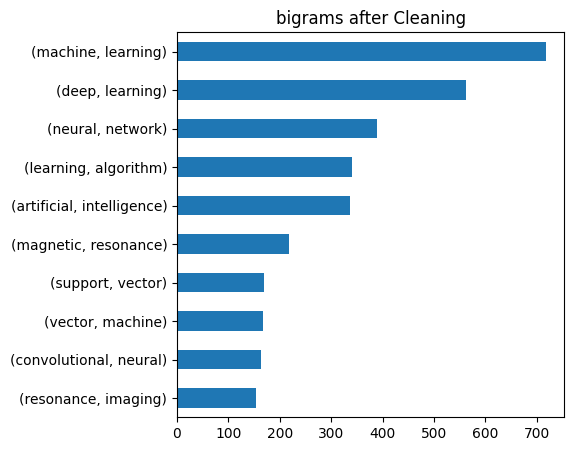

In [ ]:
plot_bigrams(df_column='clean_abstract', title='bigrams after Cleaning')

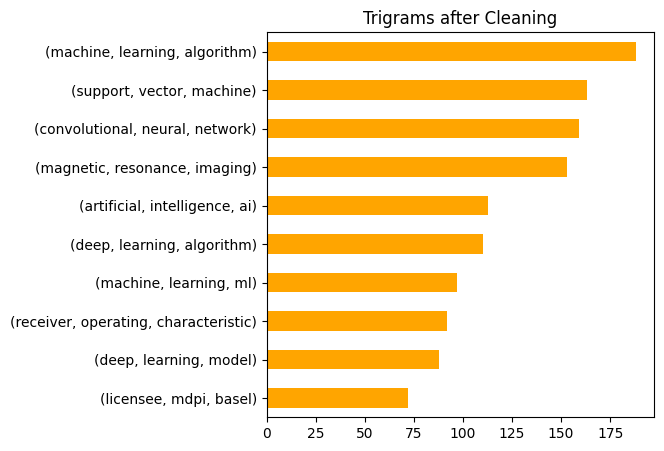

In [ ]:
plot_trigrams(df_column='clean_abstract', title='Trigrams after Cleaning')

In [ ]:
computer_vision_df

,authors,authors_id,title,year,source_title,abstract,abstract_words,clean_abstract
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306,purpose accurate reliable segmentation pca les...
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221,past year convolutional neural network cnns pr...
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,261,purpose developing artificial intelligencebase...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,210,motivation molecular phenotyping gene expressi...
13,"Naik N., Tokas T., Shetty D.K., Hameed B.M.Z.,...",57205319450;14038434500;55578389700;5721381163...,Role of Deep Learning in Prostate Cancer Manag...,2022,Journal of Clinical Medicine,This review aims to present the applications o...,238,review aim present application deep learning d...
...,...,...,...,...,...,...,...,...
3906,"Yan L., Verbel D., Saidi O.",7402671147;6602981043;56085157000;,Predicting prostate cancer recurrence via maxi...,2004,KDD-2004 - Proceedings of the Tenth ACM SIGKDD...,In order to effectively use machine learning a...,164,order effectively use machine learning algorit...
3907,"Lilien R.H., Farid H., Donald B.R.",57203259839;7007029048;7005215486;,Probabilistic Disease Classification of Expres...,2003,Journal of Computational Biology,We have developed an algorithm called Q5 for p...,201,developed algorithm called q probabilistic cla...
3910,Mattfeldt T.,21641130200;,Classification of binary spatial textures usin...,2003,International Journal of Pattern Recognition a...,Stereology and stochastic geometry can be used...,246,stereology stochastic geometry auxiliary tool ...
3912,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,Pattern recognition analysis refers to the use...,184,pattern recognition analysis refers use comput...


## LDA FOR TOPIC MODELING 

In [ ]:
import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
from gensim.corpora import Dictionary

In [ ]:
# Tokenize the clean abstracts
tokenized_abstracts = computer_vision_df['clean_abstract'].apply(lambda x: x.split())
tokenized_abstracts

2       [purpose, accurate, reliable, segmentation, pc...
3       [past, year, convolutional, neural, network, c...
10      [purpose, developing, artificial, intelligence...
12      [motivation, molecular, phenotyping, gene, exp...
13      [review, aim, present, application, deep, lear...
                              ...                        
3906    [order, effectively, use, machine, learning, a...
3907    [developed, algorithm, called, q, probabilisti...
3910    [stereology, stochastic, geometry, auxiliary, ...
3912    [pattern, recognition, analysis, refers, use, ...
3914    [classification, human, tumor, according, prim...
Name: clean_abstract, Length: 1154, dtype: object

In [ ]:
# Create a dictionary from the tokenized abstracts
dictionary = corpora.Dictionary(tokenized_abstracts)

# Convert the tokenized abstracts into a bag of words representation
corpus = [dictionary.doc2bow(abstract) for abstract in tokenized_abstracts]

In [ ]:
import random

# Set the random seed
random_seed = 71

In [ ]:
## Train the LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10,random_state=random_seed)

In [ ]:
# Print the topics and the top words for each topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.019*"model" + 0.012*"learning" + 0.011*"dose" + 0.010*"image" + 0.009*"deep" + 0.008*"patient" + 0.008*"using" + 0.007*"algorithm" + 0.006*"network" + 0.006*"result"
Topic: 1 
Words: 0.014*"ai" + 0.012*"algorithm" + 0.010*"image" + 0.010*"learning" + 0.008*"gene" + 0.007*"diagnosis" + 0.007*"analysis" + 0.007*"medical" + 0.006*"deep" + 0.006*"tumor"
Topic: 2 
Words: 0.012*"algorithm" + 0.009*"patient" + 0.008*"result" + 0.008*"using" + 0.007*"classification" + 0.007*"tumor" + 0.006*"analysis" + 0.006*"model" + 0.006*"accuracy" + 0.005*"machine"
Topic: 3 
Words: 0.012*"algorithm" + 0.010*"patient" + 0.009*"using" + 0.009*"performance" + 0.007*"clinical" + 0.006*"–" + 0.006*"lesion" + 0.005*"pirads" + 0.005*"learning" + 0.005*"accuracy"
Topic: 4 
Words: 0.008*"algorithm" + 0.008*"tumor" + 0.008*"model" + 0.008*"patient" + 0.008*"cell" + 0.007*"using" + 0.007*"gene" + 0.007*"pca" + 0.007*"result" + 0.007*"learning"
Topic: 5 
Words: 0.020*"model" + 0.012*"pca" + 0.010*"p

## Topic classification based on the generated top words 

### Topic 0: Deep Learning for Medical Imaging
### Topic 1: AI and Gene Analysis for Medical Diagnosis
### Topic 2: Machine Learning for Tumor Classification and Analysis
### Topic 3: Clinical Performance of Algorithm for Lesion Detection
### Topic 4: Gene Analysis and Machine Learning for Tumor Cell Classification
### Topic 5: Machine Learning and PCA for Feature Classification and Analysis
### Topic 6: Image Segmentation and Registration using Deep Learning
### Topic 7: Image Classification and Segmentation using Machine Learning
### Topic 8: Machine Learning for Clinical Image Detection
### Topic 9: Proposed Network Techniques for Machine Learning

### Based on the topics generated, Identify what abstracts are attached to the different topic

In [ ]:
# Mapping each abstract to its relevant topic
computer_vision_df['topic'] = [max(lda_model[doc], key=lambda x: x[1])[0] for doc in corpus]

In [ ]:
computer_vision_df.head()

,authors,authors_id,title,year,source_title,abstract,abstract_words,clean_abstract,topic
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306,purpose accurate reliable segmentation pca les...,7
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221,past year convolutional neural network cnns pr...,9
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,261,purpose developing artificial intelligencebase...,7
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,210,motivation molecular phenotyping gene expressi...,1
13,"Naik N., Tokas T., Shetty D.K., Hameed B.M.Z.,...",57205319450;14038434500;55578389700;5721381163...,Role of Deep Learning in Prostate Cancer Manag...,2022,Journal of Clinical Medicine,This review aims to present the applications o...,238,review aim present application deep learning d...,0


In [ ]:
# Map topic to topic labels
topic_labels = {
    0: 'Deep Learning for Medical Imaging',
    1: 'AI and Gene Analysis for Medical Diagnosis',
    2: 'Machine Learning for Tumor Classification and Analysis',
    3: ' Clinical Performance of Algorithm for Lesion Detection',
    4: 'Gene Analysis and Machine Learning for Tumor Cell Classification',
    5: 'Machine Learning and PCA for Feature Classification and Analysis',
    6: ' Image Segmentation and Registration using Deep Learning',
    7: 'Image Classification and Segmentation using Machine Learning',
    8: 'Machine Learning for Clinical Image Detection',
    9: 'Proposed Network Techniques for Machine Learning'}

computer_vision_df['topic_label'] = computer_vision_df['topic'].map(topic_labels)

In [ ]:
computer_vision_df

,authors,authors_id,title,year,source_title,abstract,abstract_words,clean_abstract,topic,topic_label
2,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306,purpose accurate reliable segmentation pca les...,7,Image Classification and Segmentation using Ma...
3,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221,past year convolutional neural network cnns pr...,9,Proposed Network Techniques for Machine Learning
10,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,261,purpose developing artificial intelligencebase...,7,Image Classification and Segmentation using Ma...
12,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,210,motivation molecular phenotyping gene expressi...,1,AI and Gene Analysis for Medical Diagnosis
13,"Naik N., Tokas T., Shetty D.K., Hameed B.M.Z.,...",57205319450;14038434500;55578389700;5721381163...,Role of Deep Learning in Prostate Cancer Manag...,2022,Journal of Clinical Medicine,This review aims to present the applications o...,238,review aim present application deep learning d...,0,Deep Learning for Medical Imaging
...,...,...,...,...,...,...,...,...,...,...
3906,"Yan L., Verbel D., Saidi O.",7402671147;6602981043;56085157000;,Predicting prostate cancer recurrence via maxi...,2004,KDD-2004 - Proceedings of the Tenth ACM SIGKDD...,In order to effectively use machine learning a...,164,order effectively use machine learning algorit...,7,Image Classification and Segmentation using Ma...
3907,"Lilien R.H., Farid H., Donald B.R.",57203259839;7007029048;7005215486;,Probabilistic Disease Classification of Expres...,2003,Journal of Computational Biology,We have developed an algorithm called Q5 for p...,201,developed algorithm called q probabilistic cla...,8,Machine Learning for Clinical Image Detection
3910,Mattfeldt T.,21641130200;,Classification of binary spatial textures usin...,2003,International Journal of Pattern Recognition a...,Stereology and stochastic geometry can be used...,246,stereology stochastic geometry auxiliary tool ...,8,Machine Learning for Clinical Image Detection
3912,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,Pattern recognition analysis refers to the use...,184,pattern recognition analysis refers use comput...,7,Image Classification and Segmentation using Ma...


In [ ]:
#Evaluate the coherence score of the model
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_abstracts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

In [ ]:
coherence_lda

0.35098706059969725

# TEXT SUMMARIZATION

## Text Summarization Using BART AND T5 BASE Model

In [ ]:
!pip install transformers

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00


In [ ]:
pip install summarization

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for summarization: filename=summarization-0.0.1-py3-none-any.whl size=1425 sha256=5bfb3c44ca4904dbdbd0813be6315bd06cd2c1772cc0b25f0978da6670a07478
  Stored in directory: /root/.cache/pip/wheels/f2/3c/73/664cc63808e937fe7a7d319ee3b638f15bab8c25f43c54d49e
Successfully built summarization


In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

#Load the pre-trained BART model and tokenizer
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')


# Create a list to store the summaries
bart_summaries = []

for abstract in computer_vision_df['abstract']:
    input_ids = bart_tokenizer.encode(abstract, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(input_ids, num_beams=4, max_length=80, early_stopping=True)
    summary = bart_tokenizer.decode(summary_ids.squeeze(), skip_special_tokens=True)
    bart_summaries.append(summary)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Add the summaries as a new column in the dataframe
computer_vision_df['bart_Summary'] = bart_summaries

#computer_vision_df


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from transformers import pipeline, AutoTokenizer, AutoModelWithLMHead

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("t5-base")
model = AutoModelWithLMHead.from_pretrained("t5-base")

# maximum length for the output summary
max_length = 80


for i, row in computer_vision_df.iterrows():
    abstract = row["abstract"]
    
    # Generate the summary
    inputs = tokenizer.encode("summarize: " + abstract, return_tensors="pt", max_length=max_length, truncation=True)
    outputs = model.generate(inputs, max_length=max_length, min_length=10, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    
  
    computer_vision_df.at[i, "t5_summary"] = summary


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
computer_vision_df.tail()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,authors,authors_id,title,year,source_title,abstract,abstract_words,clean_abstract,topic,topic_label,bart_Summary,t5_summary
3906,"Yan L., Verbel D., Saidi O.",7402671147;6602981043;56085157000;,Predicting prostate cancer recurrence via maxi...,2004,KDD-2004 - Proceedings of the Tenth ACM SIGKDD...,In order to effectively use machine learning a...,164,order effectively use machine learning algorit...,7,Image Classification and Performance,The concordance index (CI) is a typical metric...,the concordance index (CI) is a typical metric...
3907,"Lilien R.H., Farid H., Donald B.R.",57203259839;7007029048;7005215486;,Probabilistic Disease Classification of Expres...,2003,Journal of Computational Biology,We have developed an algorithm called Q5 for p...,201,developed algorithm called q probabilistic cla...,8,Machine Learning and Clinical Detection,"Q5 is a closed-form, exact solution to the pro...",the algorithm employs principal components ana...
3910,Mattfeldt T.,21641130200;,Classification of binary spatial textures usin...,2003,International Journal of Pattern Recognition a...,Stereology and stochastic geometry can be used...,246,stereology stochastic geometry auxiliary tool ...,8,Machine Learning and Clinical Detection,Stereology and stochastic geometry can be used...,stereology and stochastic geometry can be used...
3912,Fritsche H.A.,57210989328;,Tumor markers and pattern recognition analysis...,2002,Journal of Clinical Ligand Assay,Pattern recognition analysis refers to the use...,184,pattern recognition analysis refers use comput...,7,Image Classification and Performance,The support vector machine (SVM) is the most r...,pattern recognition tool is the basis for a ne...
3914,"Su A.I., Schultz P.G., Welsh J.B., Sapinoso L....",7005096701;57219105974;57204151090;6602443640;...,Molecular classification of human carcinomas b...,2001,Cancer Research,Classification of human tumors according to th...,172,classification human tumor according primary a...,6,Image Segmentation and Registration,"The prostate, breast, lung, ovary, colorectum,...",classification of human tumors based on primar...


In [ ]:
# Count occurrences of each topic label
topic_counts = computer_vision_df['topic_label'].value_counts()

# Sort topic counts in descending order
topic_counts = topic_counts.sort_values(ascending=False)

# Display topic counts
print("Topic Label Counts:")
print(topic_counts)

Topic Label Counts:
Image Classification and Segmentation using Machine Learning        283
Machine Learning for Clinical Image Detection                       155
Machine Learning and PCA for Feature Classification and Analysis    126
AI and Gene Analysis for Medical Diagnosis                          112
Deep Learning for Medical Imaging                                   108
Gene Analysis and Machine Learning for Tumor Cell Classification     92
 Clinical Performance of Algorithm for Lesion Detection              81
Proposed Network Techniques for Machine Learning                     74
Machine Learning for Tumor Classification and Analysis               65
 Image Segmentation and Registration using Deep Learning             58
Name: topic_label, dtype: int64


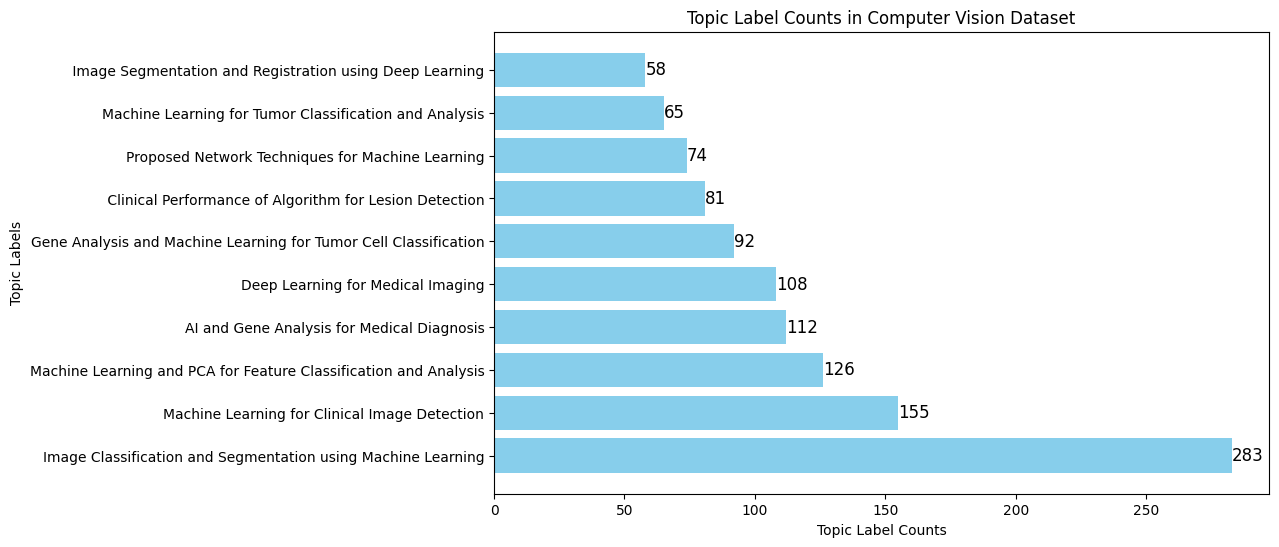

In [ ]:
# Count occurrences of each topic label
topic_counts = computer_vision_df['topic_label'].value_counts()

# Sort topic counts in descending order
topic_counts = topic_counts.sort_values(ascending=False)

# horizontal bar chart
plt.figure(figsize=(10, 6)) 
plt.barh(topic_counts.index, topic_counts.values, color='skyblue')
plt.xlabel('Topic Label Counts')
plt.ylabel('Topic Labels') 
plt.title('Topic Label Counts in Computer Vision Dataset') 

# Add tooltips
for i, count in enumerate(topic_counts.values):
    plt.text(count, i, str(count), ha='left', va='center', color='black', fontsize=12) 

plt.show() 


In [ ]:
#Year with the most to least publication

year_counts = computer_vision_df.groupby('year')['abstract'].count().sort_values(ascending=False)

print(year_counts)


year
2021    273
2022    259
2020    164
2019    119
2018     62
2017     43
2023     37
2016     33
2015     21
2013     20
2014     16
2008     15
2010     15
2007     13
2009     11
2005     10
2004     10
2011      7
2012      7
2006      7
2003      3
2000      3
2002      2
1998      2
1999      1
2001      1
Name: abstract, dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


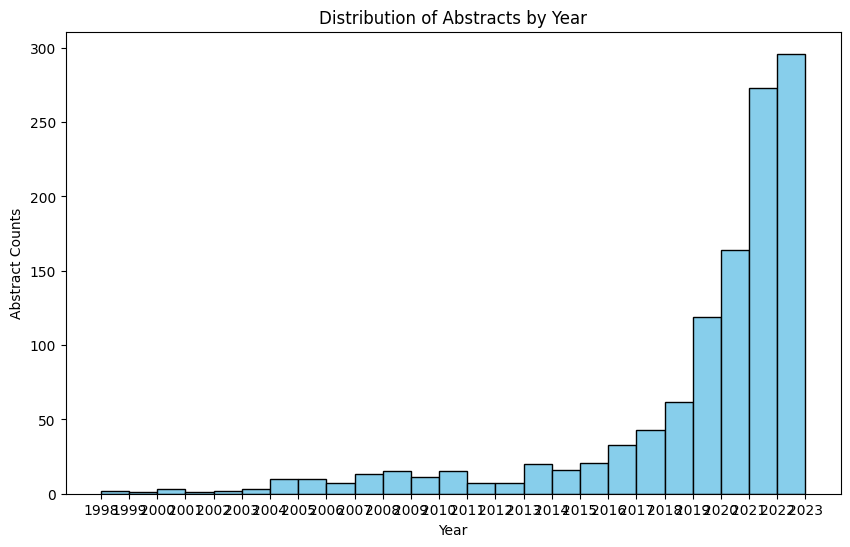

In [ ]:
#histogram of abstract counts by year
plt.figure(figsize=(10, 6))
plt.hist(computer_vision_df['year'], bins=range(computer_vision_df['year'].min(), computer_vision_df['year'].max()+1), color='skyblue', edgecolor='black') # Plot the histogram
plt.xlabel('Year')
plt.ylabel('Abstract Counts')
plt.title('Distribution of Abstracts by Year')
plt.xticks(range(computer_vision_df['year'].min(), computer_vision_df['year'].max()+1))
plt.show()


In [ ]:
#Topic with increased publication over the years 

topic_year_counts = computer_vision_df.groupby(['year', 'topic_label']).size().unstack()

# percentage change from year to year
topic_year_pct_change = topic_year_counts.pct_change(axis=0)

#topic label with highest positive percentage change
increased_topic = topic_year_pct_change.mean().idxmax()

print("Topic with the highest increase in occurrences over the years:", increased_topic)

Topic with the highest increase in occurrences over the years: Tumor Detection and Gene Expression


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
computer_vision_df_copy = pd.read_csv('computer_vision_summaries.csv')
computer_vision_df_copy.head()

,authors,authors_id,title,year,source_title,abstract,abstract_words,clean_abstract,topic,topic_label,bart_Summary,t5_summary
0,"Liu Y., Zhu Y., Wang W., Zheng B., Qin X., Wan...",57312546700;55723822400;57205100822;5719009012...,Multi-scale discriminative network for prostat...,2022,Medical Physics,Purpose: The accurate and reliable segmentatio...,306,purpose accurate reliable segmentation pca les...,7,Image Classification and Segmentation using Ma...,The accurate and reliable segmentation of pros...,accurate and reliable segmentation of PCa lesi...
1,"Song X., Chao H., Xu X., Guo H., Xu S., Turkbe...",57226258186;57219471053;56903224000;5721415099...,Cross-modal attention for multi-modal image re...,2022,Medical Image Analysis,"In the past few years, convolutional neural ne...",221,past year convolutional neural network cnns pr...,9,Proposed Network Techniques for Machine Learning,"In the past few years, convolutional neural ne...",convolutional neural networks (CNNs) have been...
2,"Salman M.E., Çakirsoy Çakar G., Azimjonov J., ...",57657632200;57657632300;57219830959;6603721364...,Automated prostate cancer grading and diagnosi...,2022,Expert Systems with Applications,Purpose: Developing an artificial intelligence...,261,purpose developing artificial intelligencebase...,7,Image Classification and Segmentation using Ma...,Yolo general-purpose object detection algorith...,the algorithm was based on the Yolo general-pu...
3,"Weitz P., Wang Y., Kartasalo K., Egevad L., Li...",57190283256;57221152137;56926765900;5511353300...,Transcriptome-wide prediction of prostate canc...,2022,Bioinformatics,Motivation: Molecular phenotyping by gene expr...,210,motivation molecular phenotyping gene expressi...,1,AI and Gene Analysis for Medical Diagnosis,Molecular phenotyping by gene expression profi...,changes in gene expression occurring in tumour...
4,"Naik N., Tokas T., Shetty D.K., Hameed B.M.Z.,...",57205319450;14038434500;55578389700;5721381163...,Role of Deep Learning in Prostate Cancer Manag...,2022,Journal of Clinical Medicine,This review aims to present the applications o...,238,review aim present application deep learning d...,0,Deep Learning for Medical Imaging,This review aims to present the applications o...,aims to present the applications of deep learn...


# RESULTS AND EVALUATION

In [6]:
computer_vision_topic_time = computer_vision_df_copy.groupby(['topic_label', 'year']).size().reset_index(name='counts')


In [ ]:
#2023 provides some Anomly to the results due to insufficient data being collect for the year, so dropping that year to carry out subsequent analysis
computer_vision_topic_time = computer_vision_topic_time[computer_vision_topic_time['year'] != 2023]


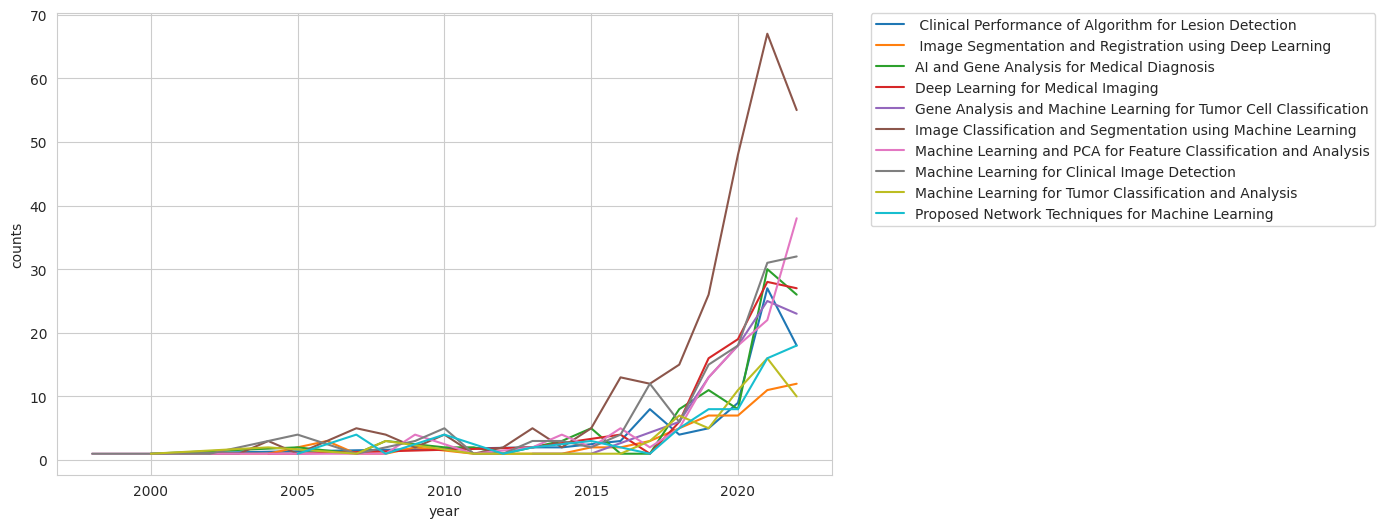

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

sns.lineplot(x="year", y="counts", hue="topic_label", data=computer_vision_topic_time, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()


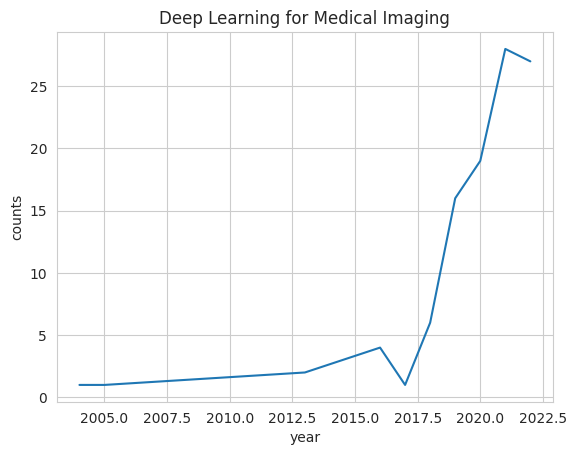

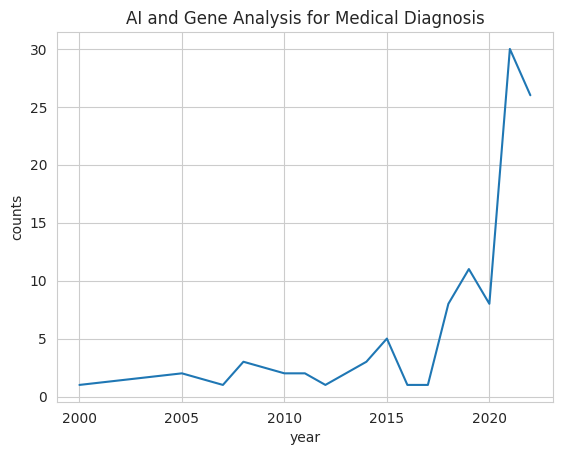

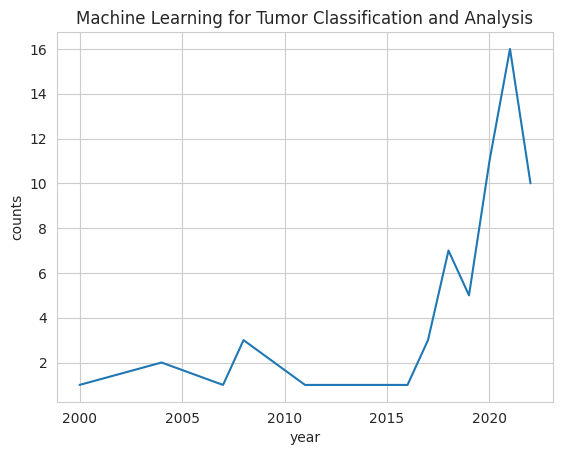

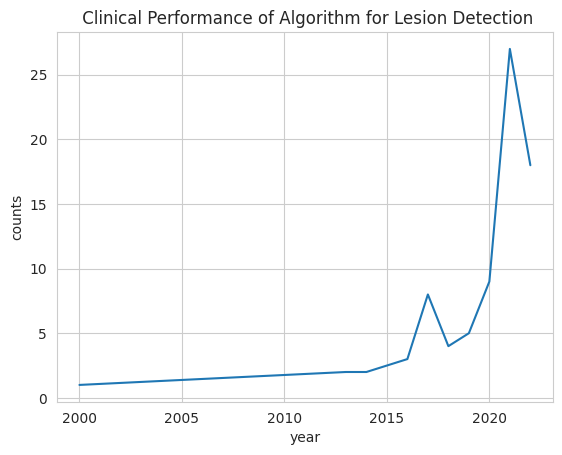

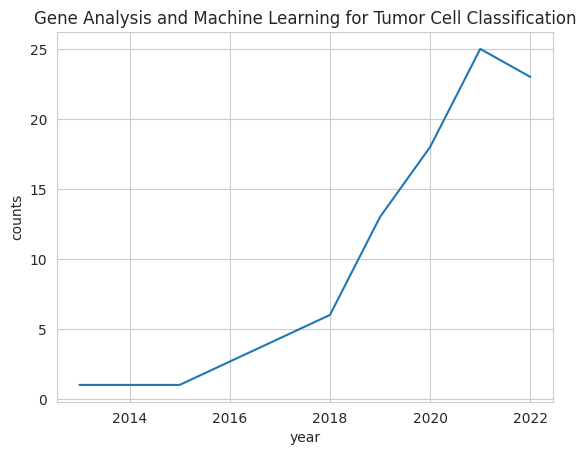

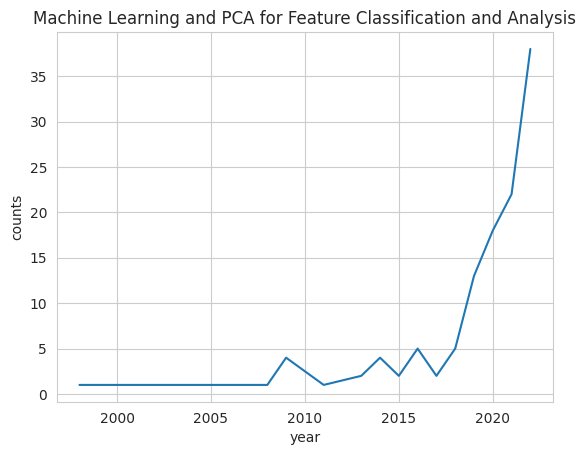

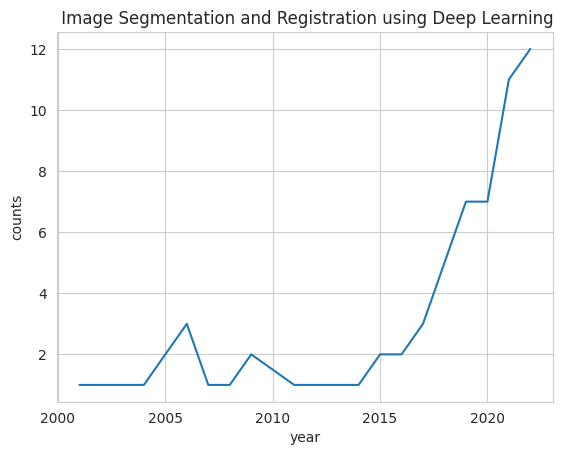

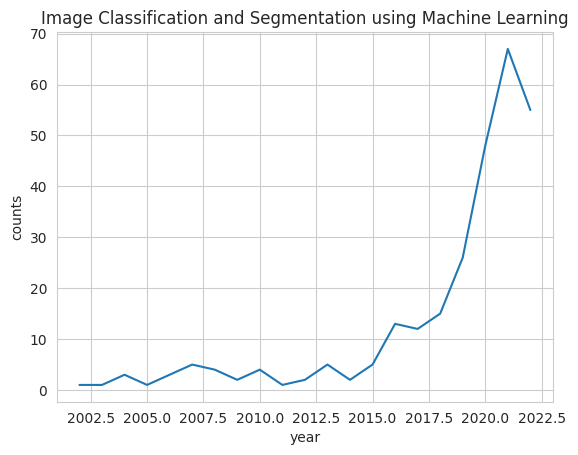

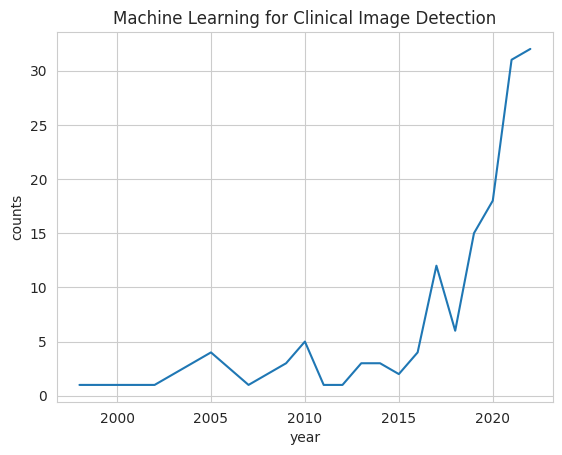

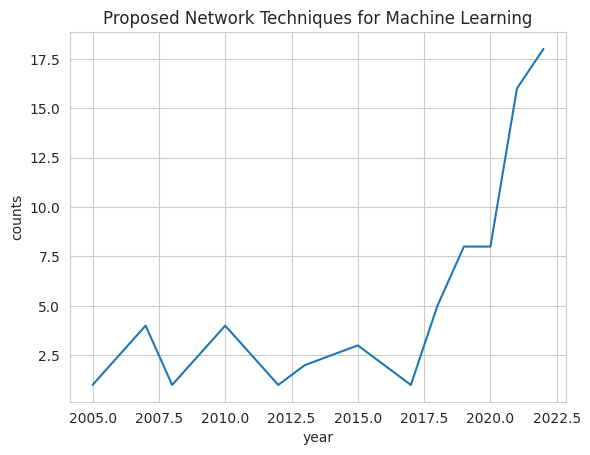

In [ ]:
# plot for each topic
topics = ['Deep Learning for Medical Imaging',
          'AI and Gene Analysis for Medical Diagnosis',
          'Machine Learning for Tumor Classification and Analysis',
          ' Clinical Performance of Algorithm for Lesion Detection',
          'Gene Analysis and Machine Learning for Tumor Cell Classification',
          'Machine Learning and PCA for Feature Classification and Analysis',
          ' Image Segmentation and Registration using Deep Learning',
          'Image Classification and Segmentation using Machine Learning',
          'Machine Learning for Clinical Image Detection',
          'Proposed Network Techniques for Machine Learning']

for topic in topics:

    topic_graph = computer_vision_topic_time[computer_vision_topic_time['topic_label'] == topic]

    # line plot of the counts over time
    sns.lineplot(x='year', y='counts', data=topic_graph)
    
    # label 
    plt.title(topic)
    
   
    plt.show()


In [ ]:

# Create pivot table of the Summaries and Topics 
pivot_table = pd.pivot_table(computer_vision_df_copy, values=['t5_summary', 'bart_Summary'], index=['topic_label', 'topic'], aggfunc='count')

pivot_table_sorted = pivot_table.sort_values(by='bart_Summary', ascending=False)

print(pivot_table_sorted)


                                                  bart_Summary  t5_summary
topic_label                                topic                          
Image Classification and Performance       7               283         283
Machine Learning and Clinical Detection    8               155         155
Machine Learning and Feature Extraction    5               126         126
AI and Medical Diagnosis                   1               112         112
Model Learning and Image Processing        0               108         108
Tumor Detection and Gene Expression        4                92          92
Clinical Performance Evaluation            3                81          81
Network Learning and Technique Development 9                74          74
Classification and Accuracy                2                65          65
Image Segmentation and Registration        6                58          58


## Check The average wordcounts for the summaries 


In [ ]:
t5_counts = computer_vision_df_copy['t5_summary'].str.split().apply(len)
bart_counts = computer_vision_df_copy['bart_Summary'].str.split().apply(len)
main_abstract_counts = computer_vision_df_copy['abstract'].str.split().apply(len)

t5_avg_word_count = np.mean(t5_counts)
bart_avg_word_count = np.mean(bart_counts)
abstract_avg_word_count = np.mean(main_abstract_counts)


print(f"Average word count for T5 summaries: {t5_avg_word_count:.2f}")
print(f"Average word count for Bart summaries: {bart_avg_word_count:.2f}")
print(f"Average word count for the main abstracts: {abstract_avg_word_count:.2f}")


Average word count for T5 summaries: 31.96
Average word count for Bart summaries: 50.90
Average word count for the main abstracts: 245.01


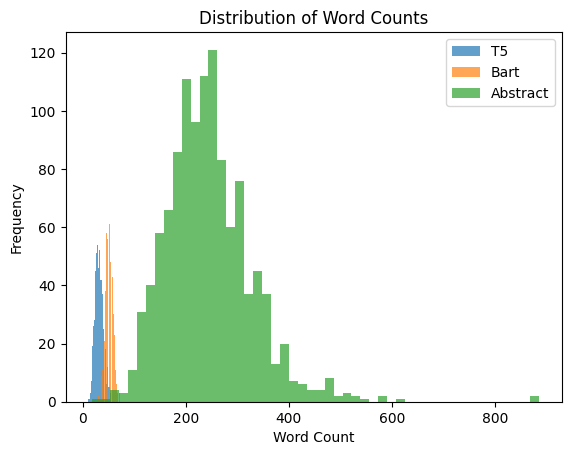

In [ ]:

plt.hist(t5_counts, bins=50, alpha=0.7, label='T5')
plt.hist(bart_counts, bins=50, alpha=0.7, label='Bart')
plt.hist(main_abstract_counts, bins=50, alpha=0.7, label='Abstract')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.legend(loc='upper right')
plt.show()



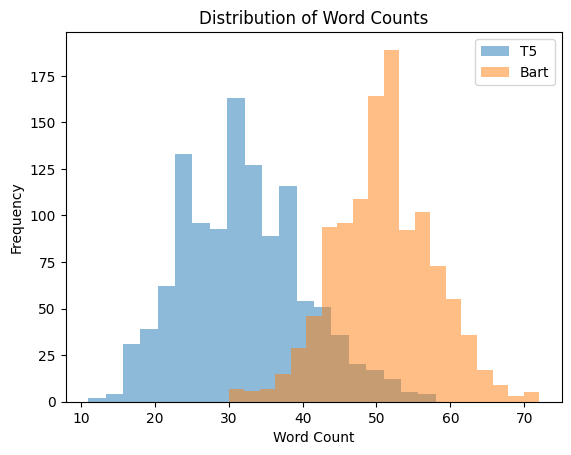

In [ ]:
#plot wordcount distribution between bart and t5 models

plt.hist(t5_counts, bins=20, alpha=0.5, label='T5')
plt.hist(bart_counts, bins=20, alpha=0.5, label='Bart')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.legend(loc='upper right')
plt.show()

# EVALUATIONS USING ROUGE 


In [ ]:
pip install rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rouge import Rouge

rouge = Rouge()

t5_summaries = computer_vision_df_copy['t5_summary']
bart_summaries = computer_vision_df_copy['bart_Summary']
abstracts = computer_vision_df_copy['abstract']

t5_scores = rouge.get_scores(t5_summaries, abstracts, avg=True)
bart_scores = rouge.get_scores(bart_summaries, abstracts, avg=True)
# Rouge Scores
print("T5 ROUGE Scores:", t5_scores)
print("BART ROUGE Scores:", bart_scores)


T5 ROUGE Scores: {'rouge-1': {'r': 0.17497354877680285, 'p': 0.9405792501155648, 'f': 0.2886520468009962}, 'rouge-2': {'r': 0.11915749908848391, 'p': 0.822464243410405, 'f': 0.20294184993316253}, 'rouge-l': {'r': 0.1735472316626794, 'p': 0.9329108903256029, 'f': 0.28630119627968986}}
BART ROUGE Scores: {'rouge-1': {'r': 0.2958863716014041, 'p': 0.9770145466165546, 'f': 0.4461168992012136}, 'rouge-2': {'r': 0.22836573546205946, 'p': 0.9371454771480566, 'f': 0.35866059552411417}, 'rouge-l': {'r': 0.2954976241430175, 'p': 0.9756682982695812, 'f': 0.44552181624048914}}


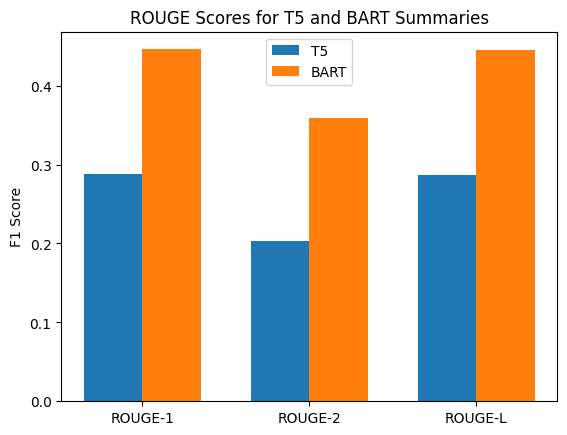

In [ ]:

t5_scores = {'rouge-1': {'r': 0.17497354877680285, 'p': 0.9405792501155648, 'f': 0.2886520468009962}, 
             'rouge-2': {'r': 0.11915749908848391, 'p': 0.822464243410405, 'f': 0.20294184993316253}, 
             'rouge-l': {'r': 0.1735472316626794, 'p': 0.9329108903256029, 'f': 0.28630119627968986}}

bart_scores = {'rouge-1': {'r': 0.2958863716014041, 'p': 0.9770145466165546, 'f': 0.4461168992012136}, 
               'rouge-2': {'r': 0.22836573546205946, 'p': 0.9371454771480566, 'f': 0.35866059552411417}, 
               'rouge-l': {'r': 0.2954976241430175, 'p': 0.9756682982695812, 'f': 0.44552181624048914}}

# F1 scores from the dictionaries
t5_f1_scores = [t5_scores['rouge-1']['f'], t5_scores['rouge-2']['f'], t5_scores['rouge-l']['f']]
bart_f1_scores = [bart_scores['rouge-1']['f'], bart_scores['rouge-2']['f'], bart_scores['rouge-l']['f']]

x-axis labels
labels = ['ROUGE-1', 'ROUGE-2', 'ROUGE-L']

width = 0.35

# bar plot
fig, ax = plt.subplots()
t5_bars = ax.bar(np.arange(len(labels)) - width/2, t5_f1_scores, width, label='T5')
bart_bars = ax.bar(np.arange(len(labels)) + width/2, bart_f1_scores, width, label='BART')

# labels and title
ax.set_ylabel('F1 Score')
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_title('ROUGE Scores for T5 and BART Summaries')
ax.legend()

plt.show()


# TOP SUMMARIES FOR EACH TOPIC


In [ ]:
rouge = Rouge()

# Group the abstracts by topic label
abstract_groups = computer_vision_df_copy.groupby('topic_label')

summaries = []

# Loop through each topic group
for name, group in abstract_groups:
    # Calculate the Rouge scores
    rouge_scores = rouge.get_scores(group['t5_summary'], group['abstract'], avg=True)
    group['rouge_score'] = rouge_scores['rouge-1']['f']

    group = group.sort_values('rouge_score', ascending=False)
    
    # Select the top row of the group DataFrame
    top_row = group.head(1)
    
    T5 and BART summaries for the top row
    t5_top_summary = top_row['t5_summary'].tolist()
    bart_top_summary = top_row['bart_Summary'].tolist()

    # Append the topic label and the top summary to the summaries list
    summaries.append([name] + t5_top_summary + bart_top_summary)

# Create a DataFrame from the summaries list
columns = ['Topic', 'T5 Summary 1', 'BART Summary 1']
summary_df = pd.DataFrame(summaries, columns=columns)


In [ ]:
summary_df.head(10)


,Topic,T5 Summary 1,BART Summary 1
0,Clinical Performance of Algorithm for Lesion Detection,high-intensity focused ultrasound (HIFU) has been studied for the purpose of developing a variety of medical therapies. little research has been performed to validate numerical simulations and in-vivo HIFU treatments.,"High-intensity focused ultrasound (HIFU) has been studied for the purpose of developing a variety of medical therapies. In laboratory experiments, HIFU is induced in a tank filled with distilled water, and the incident waves are scattered at a bone phantom plate. Advanced filtering and computer vision techniques are adopted and their general feasibility is demonstrated."
1,Image Segmentation and Registration using Deep Learning,the proceedings contain 40 papers. the topics discussed include: study on the performance of modified sludge biochar.,The proceedings contain 40 papers. The topics discussed include: study on the performance of modified sludge biochar loaded with microbial agents. identifying prognostic genes of prostate cancer and exploring their expression patterns using single-cell analysis. In silico investigation of oxindole alkaloids from Uncaria perrottetii and Un caria lanosa f. philippinensis for
2,AI and Gene Analysis for Medical Diagnosis,changes in gene expression occurring in tumours cause morphological changes in tissue. the relationship between morphological patterns and molecular phenotyping remains resource intensive to implement. morphological patterns can be observed on the microscopic level.,"Molecular phenotyping by gene expression profiling is central in contemporary cancer research and in molecular diagnostics. Changes in gene expression occurring in tumours cause morphological changes in tissue, which can be observed on the microscopic level. Relationship between morphological patterns and some of the molecular phenotype can be exploited to predict molecular phenotypes."
3,Deep Learning for Medical Imaging,aims to present the applications of deep learning (DL) in prostate cancer diagnosis and treatment. advances in computational power have allowed more extensive and more complex DL models to be trained on large datasets.,"This review aims to present the applications of deep learning (DL) in prostate cancer diagnosis and treatment. The constant improvement in DL models should drive more research focusing on deep learning applications. Future research should prioritize developing models that can train on encrypted images, allowing increased data sharing and accessibility."
4,Gene Analysis and Machine Learning for Tumor Cell Classification,convolution neural networks (CNNs) are achieving success in various computer vision tasks. convolution neural networks (cnns) have been applied in the field of prostate cancer diagnosis.,Convolution neural networks (CNNs) are achieving remarkable success in various computer vision tasks. Various CNN architectures and methodologies have been applied in the field of prostate cancer diagnosis. The architecture of the final CNN model was optimised on the basis of the Prostate Imaging Reporting and Data System (PI-RADS) standard.
5,Image Classification and Segmentation using Machine Learning,accurate and reliable segmentation of PCa lesions is crucial to the image-guided intervention and treatment of prostate disease. mpMRI sequences combine local and global information to retain features of small targets at multiple scale.,"The accurate and reliable segmentation of prostate cancer (PCa) lesions is crucial to the image-guided intervention and treatment of prostate disease. For PCa lesion segmentation, it is essential to reliably combine local and global information to retain the features of small targets at multiple scales. This study proposes a multi-scale segmentation network with a cascading pyramid convolution module (C"
6,Machine Learning and PCA for Feature Classification and Analysis,the proceedings contain 65 papers. topics discussed include: comprehensive

In [ ]:
summary_df.to_csv('top_summary.csv', index=False)
files.download('top_summary.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>